1. Выбрал данные о продажах в онлайн-ритейлере


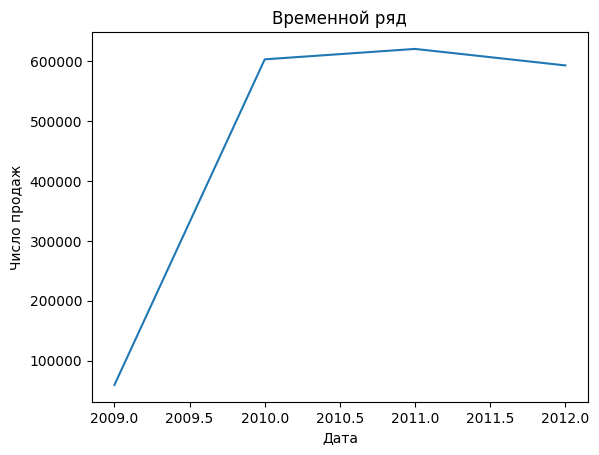

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("online_retail.csv")

data['date'] = pd.to_datetime(data['date'])

data = data.groupby(data['date'].dt.year)['total sales'].sum().reset_index()

plt.plot(data['date'], data["total sales"])
plt.xlabel("Дата")
plt.ylabel("Число продаж")
plt.title("Временной ряд")
plt.show()

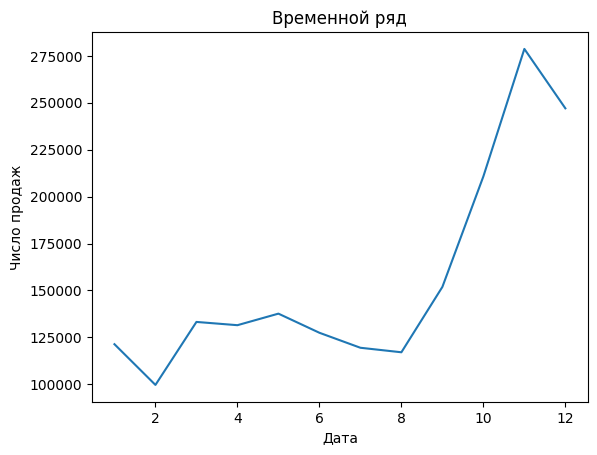

In [34]:
data = pd.read_csv("online_retail.csv")

data['date'] = pd.to_datetime(data['date'])

data = data.groupby(data['date'].dt.month)['total sales'].sum().reset_index()

plt.plot(data['date'], data["total sales"])
plt.xlabel("Дата")
plt.ylabel("Число продаж")
plt.title("Временной ряд")
plt.show()

**На основе построенных графиков виден, тренд увеличения числа продаж до 2010 года, а затем низка волотильность показателей. Так же по статистике видно значительное увеличение продаж с 9го по 11й месяц каждого года.**

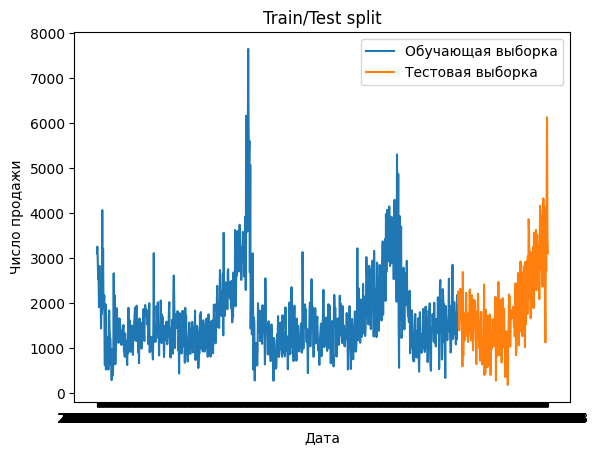

In [36]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("online_retail.csv")

# train/test split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# visual train/test split
plt.plot(train_data["date"], train_data["total sales"], label="Обучающая выборка")
plt.plot(test_data["date"], test_data["total sales"], label="Тестовая выборка")
plt.xlabel("Дата")
plt.ylabel("Число продажи")
plt.title("Train/Test split")
plt.legend()
plt.show()

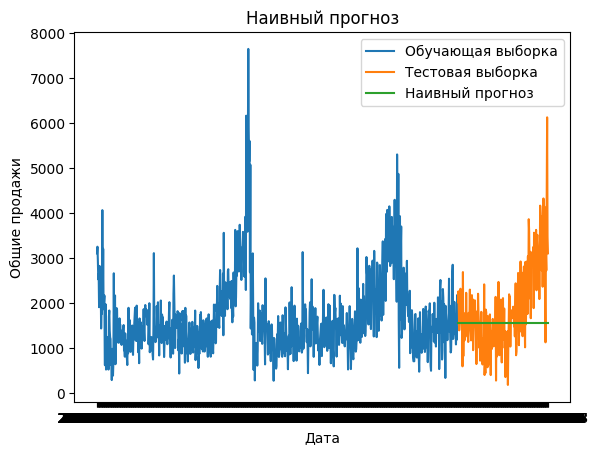

In [37]:
import numpy as np

data = pd.read_csv("online_retail.csv")

# Постройте бейзлайн в виде наивного прогноза
naive_forecast = np.repeat(train_data["total sales"].values[-1], len(test_data))

# Визуализация бейзлайн в виде наивного прогноза
plt.plot(train_data["date"], train_data["total sales"], label="Обучающая выборка")
plt.plot(test_data["date"], test_data["total sales"], label="Тестовая выборка")
plt.plot(test_data["date"], naive_forecast, label="Наивный прогноз")
plt.xlabel("Дата")
plt.ylabel("Общие продажи")
plt.title("Наивный прогноз")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Вычисление MSE и MAE
mse = mean_squared_error(test_data["total sales"], naive_forecast)
mae = mean_absolute_error(test_data["total sales"], naive_forecast)

print("MSE наивного прогноза:", mse)
print("MAE наивного прогноза:", mae)

MSE наивного прогноза: 971724.8110583076
MAE наивного прогноза: 706.8169459426873


На основе предоставленных данных наивный прогноз имеет высокую среднеквадратичную ошибку (MSE) и относительно низкую среднюю абсолютную ошибку (MAE) .

Высокая среднеквадратичная ошибка указывает на то, что наивный прогноз не очень точно предсказывает фактические значения. Большая разница между среднеквадратичной ошибкой и средней абсолютной ошибкой говорит о том, что ошибки распределены ненормально, причем некоторые ошибки намного больше других. Это может быть связано с выбросами в данных или с тем, что наивный прогноз не может уловить истинную внутреннюю закономерность данных. **bold text**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv('online_retail.csv')
data = df['total sales']

# Разделение на train/test
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Тест Дики-Фуллера
result = adfuller(train_data)
print("ADF статистика:", result[0])
print("p-value:", result[1])
print(result)


ADF статистика: -3.0495151022439986
p-value: 0.030521975094373203
(-3.0495151022439986, 0.030521975094373203, 20, 862, {'1%': -3.4379589097679975, '5%': -2.86489877693665, '10%': -2.568558467170181}, 13250.21513505042)


**Вывод на основе теста Дики-Фуллера:
Тест Дики-Фуллера указывает на то, что временной ряд является стационарным.
Статистика Дики-Фуллера (-3.0495151022439986) меньше критического значения на уровне 1% (-3.4379589097679975). Это означает, что мы можем отвергнуть нулевую гипотезу о том, что временной ряд имеет единичный корень (т.е. не является стационарным).
Величина p-значения (0,030521975094373203) также меньше 0,05, что поддерживает вывод о стационарности.**

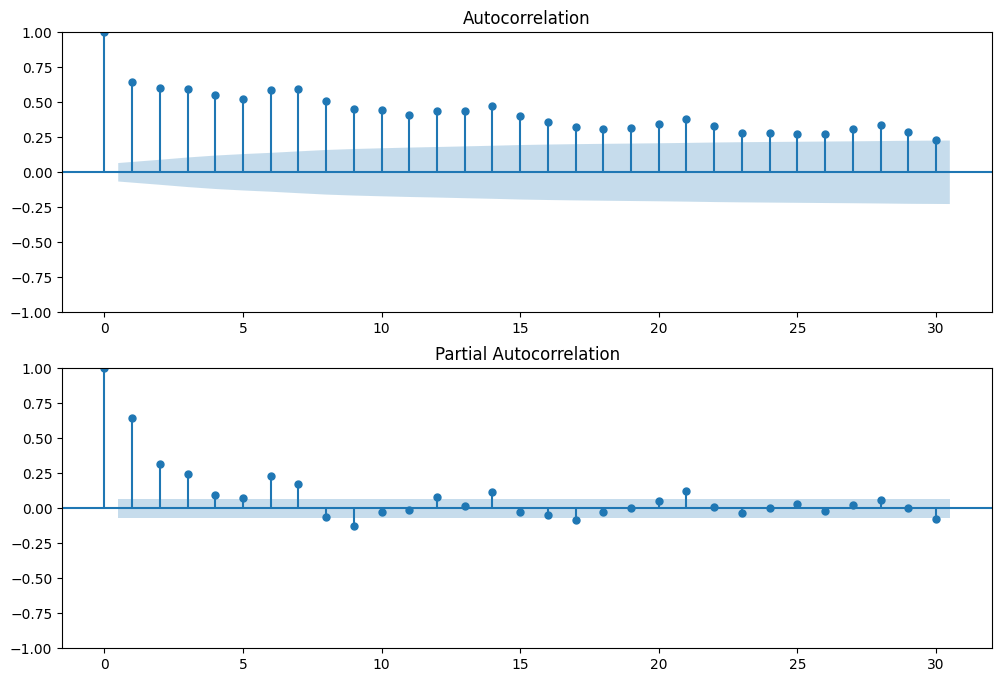

In [42]:
# Графики ACF и PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_data, ax=ax1, lags=30)
plot_pacf(train_data, ax=ax2, lags=30)
plt.show()

**На графике ACF мы можем искать сезонность по периодическим "зубцам" (линиям) за пределами зоны значимости (синей полосы). Поскольку есть значительные линии за пределами зоны значимости, это указывает на сезонность.

На графике PACF мы можем искать наличие автокорреляции после определенных лагов. После лагов, отсуствуют значительные линии, это может указывать на отсуствие или слабую сезонность в данных.**

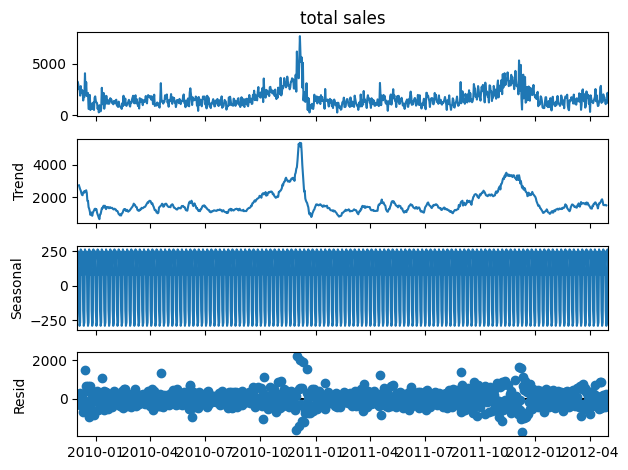

In [27]:
# Предположения о сезонности
decomposition = seasonal_decompose(train_data, model='additive', period=7)
decomposition.plot()
plt.show()

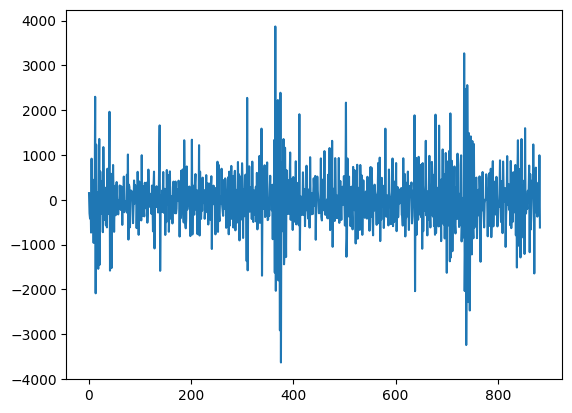

In [46]:
# Преобразования для стационарности
diff_train_data = train_data.diff().dropna()
diff_train_data.plot()
plt.show()

ADF статистика: -9.19970908147118
p-value: 2.017486419005399e-15
(-9.19970908147118, 2.017486419005399e-15, 19, 862, {'1%': -3.4379589097679975, '5%': -2.86489877693665, '10%': -2.568558467170181}, 13239.852595822787)


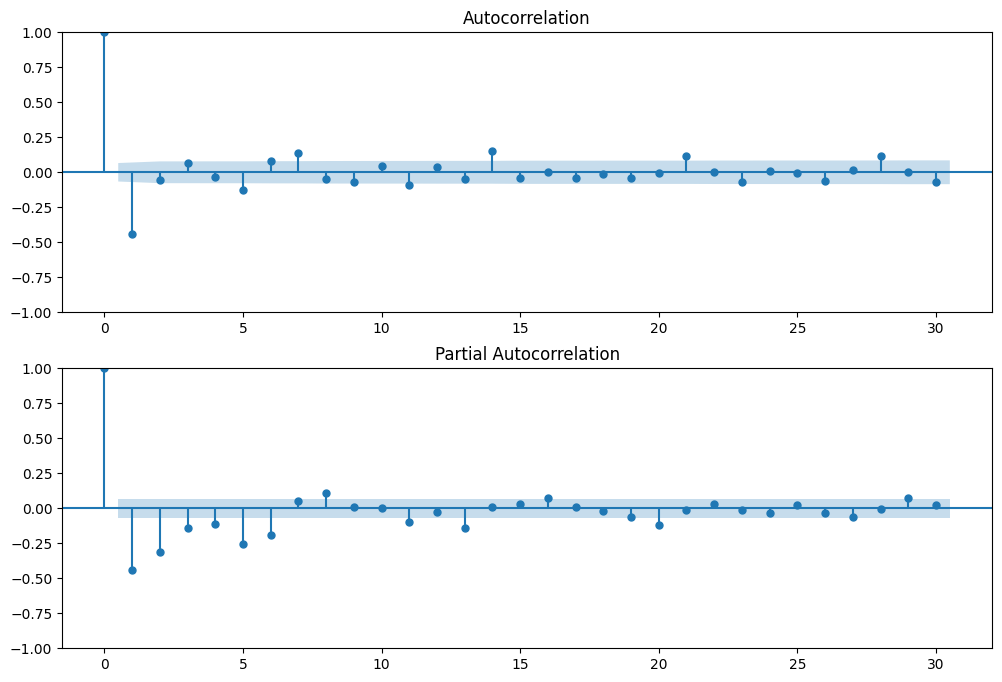

In [48]:
# Тест Дики-Фуллера и графики ACF/PACF после преобразования
result = adfuller(diff_train_data)
print("ADF статистика:", result[0])
print("p-value:", result[1])
print(result)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_train_data, ax=ax1, lags=30)
plot_pacf(diff_train_data, ax=ax2, lags=30)
plt.show()

**Тест Дики-Фуллера после преобразования данных по-прежнему указывает на то, что временной ряд является стационарным, но уже в большей степени.
Статистика Дики-Фуллера (-9.19970908147118) намного меньше критического значения на уровне 1% (-3.4379589097679975). Это означает, что мы можем отвергнуть нулевую гипотезу о том, что временной ряд имеет единичный корень (т.е. не является стационарным) с высокой степенью уверенности.
Величина p-значения (2.017486419005399e-15) также чрезвычайно мала (намного меньше 0,05), что еще больше поддерживает вывод о стационарности.
Таким образом, мы можем сделать вывод, что преобразование данных успешно удалило единичный корень из временного ряда, и теперь он является стационарным.**

**На графике ACF мы можем искать сезонность по периодическим "зубцам" (линиям) за пределами зоны значимости (синей полосы). Поскольку отсуствуют значительные линии за пределами зоны значимости, это указывает на отсуствие сезонности сезонность.

На графике PACF мы можем искать наличие автокорреляции после определенных лагов. После лагов, отсуствуют значительные линии, это может указывать на отсуствие сезонность в данных.**

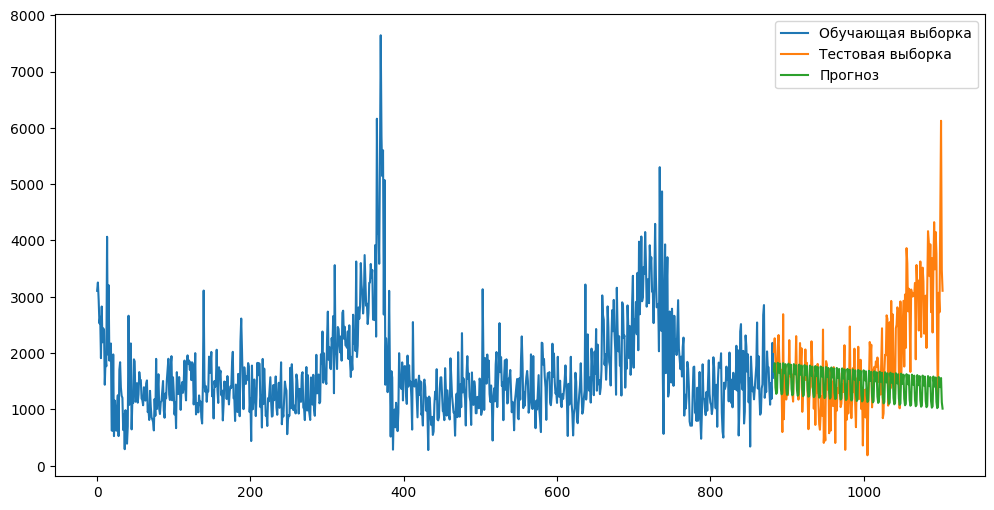

In [52]:
# Обучение модели SARIMA
model = sarimax.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fitted_model = model.fit()

# Прогнозирование
forecast = fitted_model.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Обучающая выборка')
plt.plot(test_data.index, test_data, label='Тестовая выборка')
plt.plot(forecast_mean.index, forecast_mean, label='Прогноз')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = np.mean(np.abs(forecast_mean - test_data))
print('MAE:', mae)
print('MAE baseline= 706')
mse = np.mean((forecast_mean - test_data) ** 2)
print('MSE:', mse)
print('MSE baseline = 971724.8')

MAE: 725.291696287237
MAE baseline= 706
MSE: 1088838.4485868292
MSE baseline = 971724.8


**Модель SARIMA показывает результат хуже, чем базовая модель по обоим показателям MAE и MSE. MAE модели SARIMA составляет 725,29, в то время как MAE базовой модели составляет 706.**

In [ ]:
!pip install lime
!pip install shap

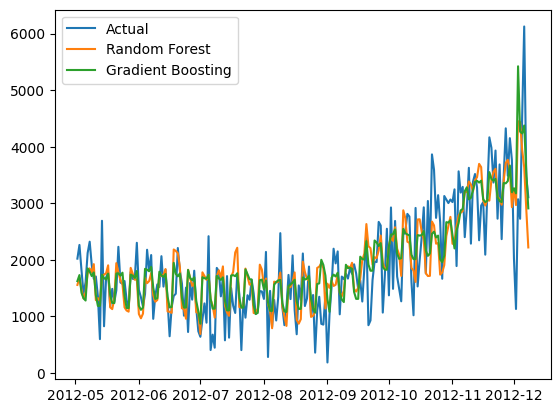

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lime
import lime.lime_tabular
import shap

data = pd.read_csv("online_retail.csv")

# Feature Engineering
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day_of_month'] = data['date'].dt.day
data['day_of_year'] = data['date'].dt.dayofyear

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# RandomForest
rf = RandomForestRegressor()
rf.fit(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']], train_data['total sales'])

# GradientBoostingа
gb = GradientBoostingRegressor()
gb.fit(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']], train_data['total sales'])

# Визуализация результатов моделей
plt.plot(test_data['date'], test_data['total sales'], label='Actual')
plt.plot(test_data['date'], rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]), label='Random Forest')
plt.plot(test_data['date'], gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]), label='Gradient Boosting')
plt.legend()
plt.show()

In [63]:
# Замеры качества моделей
rf_mse = np.mean((rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']) ** 2)
gb_mse = np.mean((gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']) ** 2)
rf_mae = np.mean(np.abs(rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']))
gb_mae = np.mean(np.abs(gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']))
print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")
print('''MAE SARIMA: 725.291696287237
MAE baseline= 706
MSE SARIMA: 1088838.4485868292
MSE baseline = 971724.8''')

Random Forest MAE: 468.4496035827712
Gradient Boosting MAE: 431.6394366105599
Random Forest MSE: 367116.5391584457
Gradient Boosting MSE: 319102.83280109166
MAE SARIMA: 725.291696287237
MAE baseline= 706
MSE SARIMA: 1088838.4485868292
MSE baseline = 971724.8


На основании предоставленных результатов Gradient Boosting превосходит Random Forest как по MAE, так и по MSE. В частности, Gradient Boosting достигает MAE 431,639 и MSE 319102,833, в то время как Random Forest получает MAE 468,449 и MSE 367116,539. Это указывает на то, что Gradient Boosting лучше справляется с точным прогнозированием и улавливанием общей тенденции данных.

По сравнению с базовой моделью Random Forest и Gradient Boosting демонстрируют значительные улучшения. Базовая модель имеет MAE 706 и MSE 971724,8, что значительно выше, чем MAE и MSE, достигнутые Random Forest и Gradient Boosting. Это говорит о том, что Random Forest и Gradient Boosting более эффективны в изучении закономерностей в данных и построении надежных прогнозов.

С другой стороны, SARIMA показывает худшие результаты по сравнению с другими моделями как по MAE, так и по MSE. SARIMA имеет MAE 725,292 и MSE 108883, которые выше, чем MAE и MSE Random Forest и Gradient Boosting. Это указывает на то, что SARIMA может быть не столь подходящей для улавливания внутренней динамики данных, как эти модели. **bold text**

In [64]:

# permutation importance
perm = lime.lime_tabular.LimeTabularExplainer(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].values, mode='regression')
perm_importance = perm.explain_instance(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].iloc[0].values, rf.predict).as_map()[1]
print("Permutation Importance:")
for feature, importance in zip(['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year'], perm_importance):
    print(f"{feature}: {importance}")


Permutation Importance:
day_of_week: (4, -344.75282954869584)
month: (0, 194.76925079797184)
year: (2, 108.18738807670756)
day_of_month: (1, -20.22617714762598)
day_of_year: (3, 14.162389162928612)


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [65]:
# LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].values, mode='regression')
lime_explanation = lime_explainer.explain_instance(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].iloc[0].values, rf.predict)
print("LIME explanation:")
print(lime_explanation.as_list())

LIME explanation:
[('74.00 < 4 <= 160.00', -314.76140122583496), ('1.00 < 0 <= 3.00', 180.8845756860562), ('3 <= 8.00', 64.03665059520107), ('3.00 < 1 <= 6.00', -49.02191227899635), ('2 > 2011.00', 46.4620075596962)]


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


SHAP local interpretation:


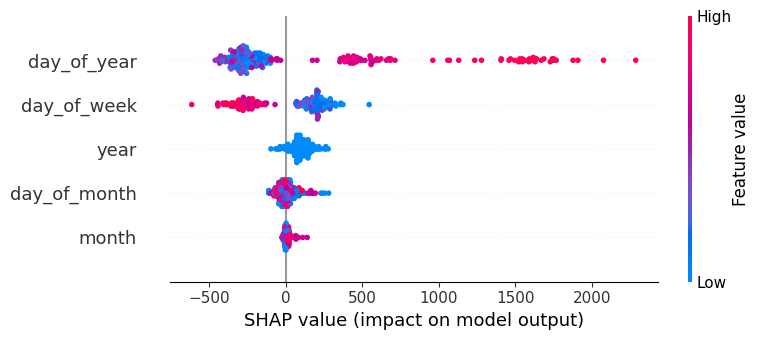

In [66]:
# Интерпретация модели с помощью SHAP (локальная интерпретация)
shap_explainer_local = shap.Explainer(rf)
shap_values_local = shap_explainer_local(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
print("SHAP local interpretation:")
shap.summary_plot(shap_values_local, test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])

SHAP global interpretation:


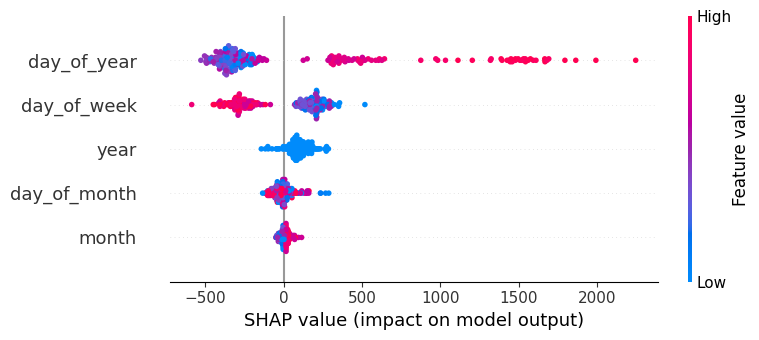

In [67]:
# Интерпретация модели с помощью SHAP (глобальная интерпретация)
shap_explainer_global = shap.Explainer(rf, train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
shap_values_global = shap_explainer_global(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
print("SHAP global interpretation:")
shap.summary_plot(shap_values_global, test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])

Важность перестановки измеряет снижение производительности модели, когда значения одного признака перемешиваются случайным образом. Этот процесс разрушает связь между признаком и целью, поэтому падение производительности указывает на то, насколько модель зависит от признака.

day_of_week: (4, -344.75282954869584) Это указывает на то, что перестановка дня недели привела к значительному снижению производительности модели, что говорит о том, что этот признак важен, но отрицательно влияет на прогнозы. month: (0, 194.76925079797184) Перемешивание месяца неожиданно улучшает производительность модели (положительное значение), что может указывать на то, что исходная модель переобучается или отрицательно интерпретирует этот признак. year: (2, 108.18738807670756) Признак года при перестановке приводит к снижению производительности, что подчеркивает его положительный вклад в прогнозы модели. day_of_month: (1, -20.22617714762598) Перемешивание дня месяца приводит к небольшому снижению производительности, что указывает на слабое отрицательное влияние. day_of_year: (3, 14.162389162928612) Небольшое увеличение производительности при перестановке дня года также может указывать на переобучение по этому признаку.

LIME предоставляет локальные объяснения, стремясь объяснить прогнозы по отдельным экземплярам с использованием интерпретируемых моделей.

('74.00 < 4 <= 160.00', -314.76140122583496): Это относится к дню недели, учитывая порядок в важности перестановки и значительное отрицательное влияние, аналогичное первой записи там, что указывает на диапазон в пределах дня недели, который отрицательно влияет на прогноз.

('1.00 < 0 <= 3.00', 180.8845756860562): соответствует месяцу, демонстрируя, что в определенном диапазоне признак месяца оказывает значительное положительное влияние на прогноз модели. **bold text**